/var/folders/85/rn2xv8ns61s_lt8kz3fjnm8r0000gn/T/ipykernel_52038/2471586237.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


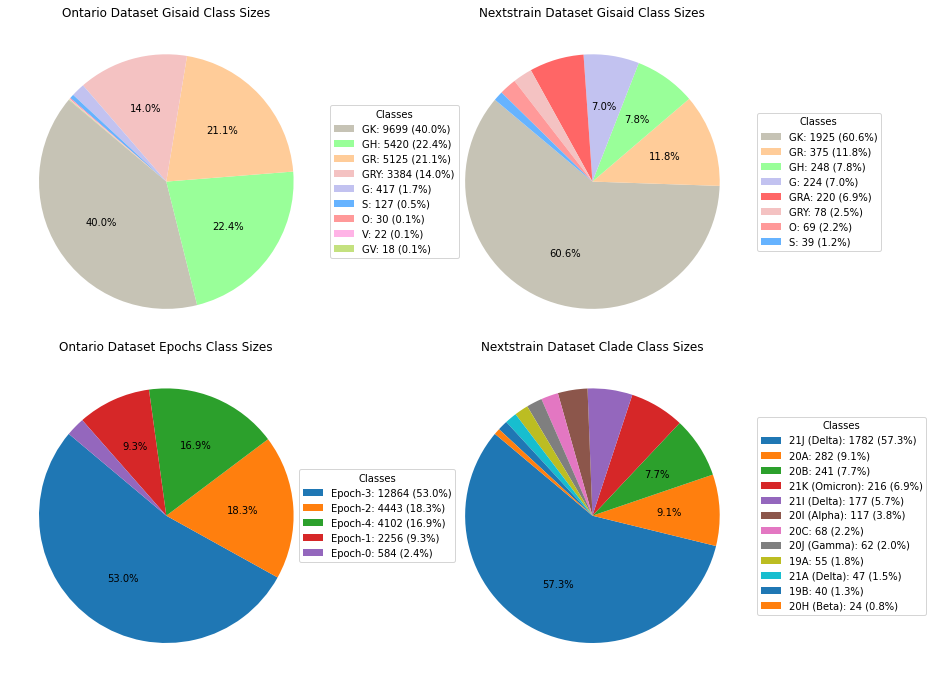

In [1]:
import matplotlib.pyplot as plt

# Data for pie charts
ontario_gisaid = {'O': 30, 'S': 127, 'GH': 5420, 'GR': 5125, 'G': 417, 'V': 22, 'GV': 18, 'GRY': 3384, 'GK': 9699}
ontario_epochs = {'Epoch-0': 584, 'Epoch-1': 2256, 'Epoch-2': 4443, 'Epoch-3': 12864, 'Epoch-4': 4102}

nextstrain_gisaid = {'GK': 1925, 'GR': 375, 'GH': 248, 'GRY': 78, 'G': 224, 'S': 39, 'O': 69, 'GRA': 220}
nextstrain_clade = {'21J (Delta)': 1782, '20B': 241, '20A': 282, '20H (Beta)': 24, '21I (Delta)': 177, '20C': 68, 
                    '20J (Gamma)': 62, '20I (Alpha)': 117, '21A (Delta)': 47, '19B': 40, '19A': 55, '21K (Omicron)': 216}

# Define a consistent color map for Gisaid classes
gisaid_colors = {
    'O': '#ff9999', 'S': '#66b3ff', 'GH': '#99ff99', 'GR': '#ffcc99', 'G': '#c2c2f0', 'V': '#ffb3e6',
    'GV': '#c4e17f', 'GRY': '#f4c2c2', 'GK': '#c6c3b5', 'GRA': '#ff6666'
}

def autopct_generator(limit):
    def inner_autopct(pct):
        return ('%1.1f%%' % pct) if pct > limit else ''
    return inner_autopct

# Function to sort the dictionary by values
def sort_dict_by_values(d):
    return dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

# Sort all data
ontario_gisaid_sorted = sort_dict_by_values(ontario_gisaid)
ontario_epochs_sorted = sort_dict_by_values(ontario_epochs)
nextstrain_gisaid_sorted = sort_dict_by_values(nextstrain_gisaid)
nextstrain_clade_sorted = sort_dict_by_values(nextstrain_clade)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12), gridspec_kw={'hspace': 0.05})

# Plot for Ontario Gisaid
wedges, texts, autotexts = axs[0, 0].pie(ontario_gisaid_sorted.values(), colors=[gisaid_colors[key] for key in ontario_gisaid_sorted.keys()], autopct=autopct_generator(7), startangle=140)
axs[0, 0].set_title('Ontario Dataset Gisaid Class Sizes')
axs[0, 0].legend(wedges, [f'{key}: {ontario_gisaid_sorted[key]} ({100*ontario_gisaid_sorted[key]/sum(ontario_gisaid_sorted.values()):.1f}%)' for key in ontario_gisaid_sorted.keys()],
                 title="Classes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot for Nextstrain Gisaid
wedges, texts, autotexts = axs[0, 1].pie(nextstrain_gisaid_sorted.values(), colors=[gisaid_colors.get(key, '#d3d3d3') for key in nextstrain_gisaid_sorted.keys()], autopct=autopct_generator(7), startangle=140)
axs[0, 1].set_title('Nextstrain Dataset Gisaid Class Sizes')
axs[0, 1].legend(wedges, [f'{key}: {nextstrain_gisaid_sorted[key]} ({100*nextstrain_gisaid_sorted[key]/sum(nextstrain_gisaid_sorted.values()):.1f}%)' for key in nextstrain_gisaid_sorted.keys()],
                 title="Classes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot for Ontario Epochs
wedges, texts, autotexts = axs[1, 0].pie(ontario_epochs_sorted.values(), autopct=autopct_generator(7), startangle=140)
axs[1, 0].set_title('Ontario Dataset Epochs Class Sizes')
axs[1, 0].legend(wedges, [f'{key}: {ontario_epochs_sorted[key]} ({100*ontario_epochs_sorted[key]/sum(ontario_epochs_sorted.values()):.1f}%)' for key in ontario_epochs_sorted.keys()],
                 title="Classes", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

# Plot for Nextstrain Clade
wedges, texts, autotexts = axs[1, 1].pie(nextstrain_clade_sorted.values(), autopct=autopct_generator(7), startangle=140)
axs[1, 1].set_title('Nextstrain Dataset Clade Class Sizes')
axs[1, 1].legend(wedges, [f'{key}: {nextstrain_clade_sorted[key]} ({100*nextstrain_clade_sorted[key]/sum(nextstrain_clade_sorted.values()):.1f}%)' for key in nextstrain_clade_sorted.keys()],
                 title="Classes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


In [ ]:
# unrelated to above, for making metric vs clade size

In [ ]:
import pandas as pd
import json

# Load the JSON data
with open("/Users/dolteanu/local_documents/Coding/MSc_github/Results/Ontario_gisaid_7/Ontario_gisaid_7_classification_reports.json") as file:
    data = json.load(file)

# Extract the relevant data into a DataFrame for analysis
records = []

for report in data:
    model = report['model']
    fold = report['fold']
    accuracy = report['accuracy']
    for cls in report['classes']:
        label = cls['label']
        precision = cls['precision']
        recall = cls['recall']
        f1_score = cls['f1-score']
        support = cls['support']
        records.append({
            'model': model,
            'fold': fold,
            'accuracy': accuracy,
            'label': label,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'support': support
        })

df = pd.DataFrame(records)
df.head()


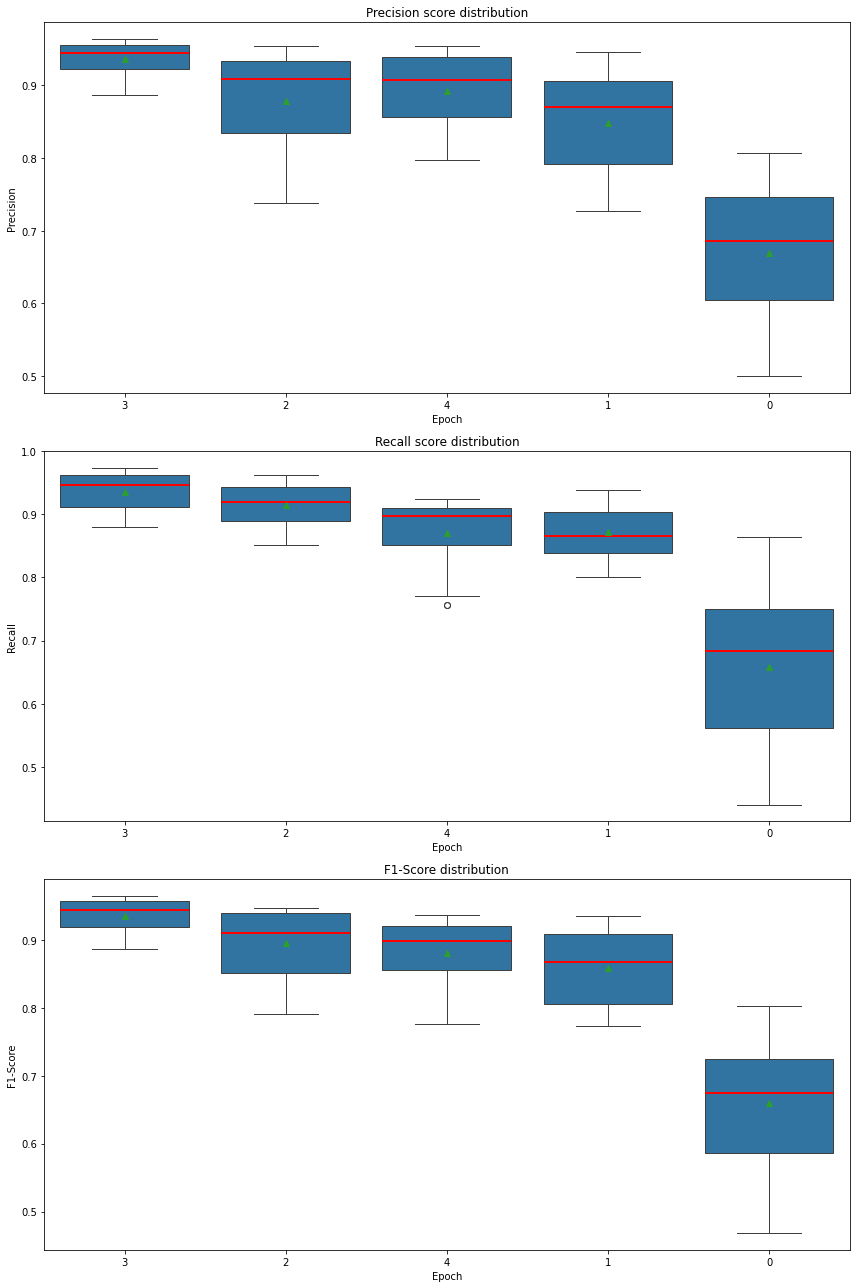

In [3]:
#boxplots of metrics for each clade
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded with your data

# Filter out the zero values for f1_score, precision, and recall
filtered_df = df[
                 (df['precision'] > 0) & 
                 (df['recall'] > 0) & 
                 (df['f1_score'] > 0) & 
                 (~df['label'].str.contains('avg'))]

# Sort the filtered dataframe by support in descending order
clade_order = filtered_df.groupby('label')['support'].mean().sort_values(ascending=False).index

# Create the plot
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Median line properties
medianprops = {"color": "red", "linewidth": 2}

# Boxplot for precision
sns.boxplot(x='label', y='precision', data=filtered_df, order=clade_order, ax=ax[0], medianprops=medianprops, showmeans=True)
ax[0].set_title('Precision score distribution')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Precision')
ax[0].tick_params(axis='x', rotation=0)

# Boxplot for recall
sns.boxplot(x='label', y='recall', data=filtered_df, order=clade_order, ax=ax[1], medianprops=medianprops, showmeans=True)
ax[1].set_title('Recall score distribution')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Recall')
ax[1].tick_params(axis='x', rotation=0)

# Boxplot for f1-score
sns.boxplot(x='label', y='f1_score', data=filtered_df, order=clade_order, ax=ax[2], medianprops=medianprops, showmeans=True)
ax[2].set_title('F1-Score distribution')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('F1-Score')
ax[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()



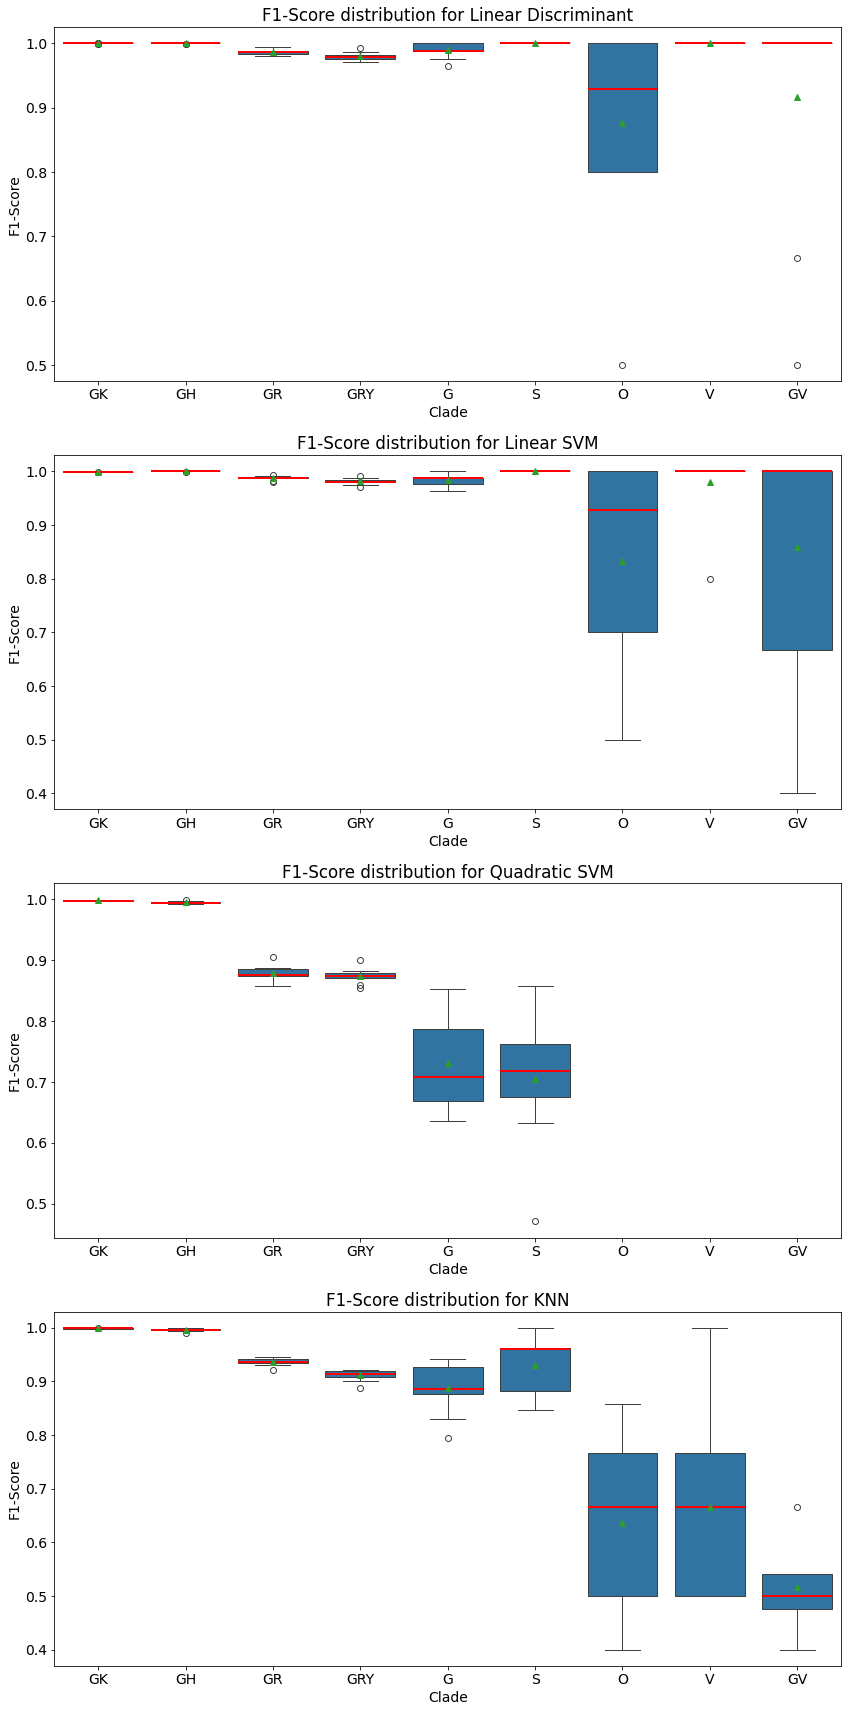

In [10]:
# boxplot of F1 vs clade for each classifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming df is already loaded with your data

# Filter out the zero values for f1_score
filtered_df = df[
    (df['f1_score'] > 0) & 
    (~df['label'].str.contains('avg'))
]

# Sort the filtered dataframe by support in descending order
clade_order = filtered_df.groupby('label')['support'].mean().sort_values(ascending=False).index

# Filter the DataFrame for each classifier
classifier_1_df = filtered_df[filtered_df['model'] == 'LinearDiscriminant']
classifier_2_df = filtered_df[filtered_df['model'] == 'LinearSVM']
classifier_3_df = filtered_df[filtered_df['model'] == 'QuadSVM']
classifier_4_df = filtered_df[filtered_df['model'] == 'KNN']

# Create the plot
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(4, 1, figsize=(12, 24))  # 4 rows for the 4 classifiers

# Median line properties
medianprops = {"color": "red", "linewidth": 2}

# Plot for Classifier 1
sns.boxplot(
    x='label',
    y='f1_score',
    data=classifier_1_df,
    order=clade_order,
    ax=ax[0],
    medianprops=medianprops,
    showmeans=True
)
ax[0].set_title('F1-Score distribution for Linear Discriminant')
ax[0].set_xlabel('Clade')
ax[0].set_ylabel('F1-Score')
ax[0].tick_params(axis='x', rotation=0)

# Plot for Classifier 2
sns.boxplot(
    x='label',
    y='f1_score',
    data=classifier_2_df,
    order=clade_order,
    ax=ax[1],
    medianprops=medianprops,
    showmeans=True
)
ax[1].set_title('F1-Score distribution for Linear SVM')
ax[1].set_xlabel('Clade')
ax[1].set_ylabel('F1-Score')
ax[1].tick_params(axis='x', rotation=0)

# Plot for Classifier 3
sns.boxplot(
    x='label',
    y='f1_score',
    data=classifier_3_df,
    order=clade_order,
    ax=ax[2],
    medianprops=medianprops,
    showmeans=True
)
ax[2].set_title('F1-Score distribution for Quadratic SVM')
ax[2].set_xlabel('Clade')
ax[2].set_ylabel('F1-Score')
ax[2].tick_params(axis='x', rotation=0)

# Plot for Classifier 4
sns.boxplot(
    x='label',
    y='f1_score',
    data=classifier_4_df,
    order=clade_order,
    ax=ax[3],
    medianprops=medianprops,
    showmeans=True
)
ax[3].set_title('F1-Score distribution for KNN')
ax[3].set_xlabel('Clade')
ax[3].set_ylabel('F1-Score')
ax[3].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()



In [ ]:
# Assuming df is already loaded with your data
# playground (remake per label latex tables)

# label_order = ["G", "GH", "GK", "GR", "GRY","GV", "O", "S","V"]
# label_order = [
#     "20H (Beta)", "20I (Alpha)", "20J (Gamma)", "19A", "19B",
#     "20A", "20B", "20C", "21A (Delta)", "21I (Delta)",
#     "21J (Delta)", "21K (Omicron)", "macro avg.", "weighted avg."
# ]

# Filter out the zero values for f1_score, precision, and recall
filtered_df = df[
                 (df['precision'] > 0) & 
                 (df['recall'] > 0) & 
                 (df['f1_score'] > 0) & 
                 (~df['label'].str.contains('avg'))]

clade_metrics = filtered_df.groupby('label').agg({
    'precision': ['mean', 'std'],
    'recall': ['mean', 'std'],
    'f1_score': ['mean', 'std']
}).reset_index()

# Flatten the MultiIndex columns
clade_metrics.columns = ['label'] + [f"{metric}_{stat}" for metric, stat in clade_metrics.columns[1:]]

# Combine mean and std into a single column with "mean ± std" format
for metric in ['precision', 'recall', 'f1_score']:
    clade_metrics[metric] = clade_metrics.apply(
        lambda row: f"{row[f'{metric}_mean']:.3f} $\pm$ {row[f'{metric}_std']:.3f}", axis=1
    )

# Keep only the formatted columns and 'label'
formatted_metrics = clade_metrics[['label', 'precision', 'recall', 'f1_score']]
formatted_metrics['label'] = pd.Categorical(formatted_metrics['label'], categories=label_order, ordered=True)
formatted_metrics = formatted_metrics.sort_values('label')
# Output to LaTeX
latex_table = formatted_metrics.to_latex(index=False, escape=False)
print(latex_table)

In [ ]:
# NOT USED violinplots of metrics for each clade
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded with your data

# Filter out the zero values for f1_score, precision, and recall
filtered_df = df[
                 (df['precision'] > 0) & 
                 (df['recall'] > 0) & 
                 (df['f1_score'] > 0) & 
                 (~df['label'].str.contains('avg'))]

# Sort the filtered dataframe by support in descending order
clade_order = filtered_df.groupby('label')['support'].mean().sort_values(ascending=False).index

# Create the plot
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Median line properties
medianprops = {"color": "red", "linewidth": 2}

# Boxplot for precision
sns.violinplot(x='label', y='precision', data=filtered_df, order=clade_order, ax=ax[0],inner="box",bw_adjust=2, cut=3)
ax[0].set_title('Precision score distribution')
ax[0].set_xlabel('Clade')
ax[0].set_ylabel('Precision')
ax[0].tick_params(axis='x', rotation=0)

# Boxplot for recall
sns.violinplot(x='label', y='recall', data=filtered_df, order=clade_order, ax=ax[1],inner="box",bw_adjust=2, cut=3)
ax[1].set_title('Recall score distribution')
ax[1].set_xlabel('Clade')
ax[1].set_ylabel('Recall')
ax[1].tick_params(axis='x', rotation=0)

# Boxplot for f1-score
sns.violinplot(x='label', y='f1_score', data=filtered_df, order=clade_order, ax=ax[2],inner="box",bw_adjust=2, cut=3)
ax[2].set_title('F1-Score distribution')
ax[2].set_xlabel('Clade')
ax[2].set_ylabel('F1-Score')
ax[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# F-1 mean & std
import pandas as pd

# Assuming df is already loaded with your data

# Filter out the zero values for f1_score in the QuadSVM model
quad_svm_f1_scores_excluding_zeros = df[(df['model'] == 'QuadSVM') & (df['f1_score'] > 0)]

# Calculate the mean and standard deviation of the macro average F1 score for Quad SVM when excluding zero values
mean_macro_f1_excluding_zeros = quad_svm_f1_scores_excluding_zeros['f1_score'].mean()
std_macro_f1_excluding_zeros = quad_svm_f1_scores_excluding_zeros['f1_score'].std()

print("Mean Macro Average F1 Score for Quad SVM (excluding zero values):", mean_macro_f1_excluding_zeros)
print("Standard Deviation of Macro Average F1 Score for Quad SVM (excluding zero values):", std_macro_f1_excluding_zeros)


In [ ]:
# Pearson Correlation plots of metrics vs sample size (not used)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming df is already loaded with your data

# Calculate mean metrics for each clade
clade_metrics = df.groupby('label').agg({
    'precision': 'mean',
    'recall': 'mean',
    'f1_score': 'mean',
    'support': 'mean'
}).reset_index()

# Calculate correlation coefficients and p-values
corr_precision, p_precision = pearsonr(clade_metrics['support'], clade_metrics['precision'])
corr_recall, p_recall = pearsonr(clade_metrics['support'], clade_metrics['recall'])
corr_f1_score, p_f1_score = pearsonr(clade_metrics['support'], clade_metrics['f1_score'])

# Plotting the impact of sample size on metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Scatter plot for precision
sns.scatterplot(x='support', y='precision', data=clade_metrics, ax=ax[0])
ax[0].set_title(f'Precision vs. Sample Size\nCorrelation: {corr_precision:.3f}, p-value: {p_precision:.3f}')
ax[0].set_xlabel('Sample Size')
ax[0].set_ylabel('Precision')

# Scatter plot for recall
sns.scatterplot(x='support', y='recall', data=clade_metrics, ax=ax[1])
ax[1].set_title(f'Recall vs. Sample Size\nCorrelation: {corr_recall:.3f}, p-value: {p_recall:.3f}')
ax[1].set_xlabel('Sample Size')
ax[1].set_ylabel('Recall')

# Scatter plot for f1-score
sns.scatterplot(x='support', y='f1_score', data=clade_metrics, ax=ax[2])
ax[2].set_title(f'F1-Score vs. Sample Size\nCorrelation: {corr_f1_score:.3f}, p-value: {p_f1_score:.3f}')
ax[2].set_xlabel('Sample Size')
ax[2].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()


In [ ]:
#Temporal analysis by mean (pearson), NOT for epochs
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Create a simple mapping for year based on the label
def extract_year(label):
    try:
        year = int(label[:2]) + 2000
    except ValueError:
        year = None
    return year

df['year'] = df['label'].apply(extract_year)

# Group by year to calculate mean and std for each metric
temporal_metrics = df.groupby('year').agg({
    'precision': ['mean', 'std'],
    'recall': ['mean', 'std'],
    'f1_score': ['mean', 'std'],
    'accuracy': ['mean', 'std']
}).reset_index()

# Flatten the multi-index columns
temporal_metrics.columns = ['year', 'precision_mean', 'precision_std', 'recall_mean', 'recall_std', 'f1_score_mean', 'f1_score_std', 'accuracy_mean', 'accuracy_std']

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Plot precision over time
ax[0, 0].errorbar(temporal_metrics['year'], temporal_metrics['precision_mean'], yerr=temporal_metrics['precision_std'], fmt='-o', color='blue')
ax[0, 0].set_title('Precision Over Time')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('Precision')

# Plot recall over time
ax[0, 1].errorbar(temporal_metrics['year'], temporal_metrics['recall_mean'], yerr=temporal_metrics['recall_std'], fmt='-o', color='green')
ax[0, 1].set_title('Recall Over Time')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('Recall')

# Plot F1-score over time
ax[1, 0].errorbar(temporal_metrics['year'], temporal_metrics['f1_score_mean'], yerr=temporal_metrics['f1_score_std'], fmt='-o', color='red')
ax[1, 0].set_title('F1-Score Over Time')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('F1-Score')

# Plot accuracy over time
ax[1, 1].errorbar(temporal_metrics['year'], temporal_metrics['accuracy_mean'], yerr=temporal_metrics['accuracy_std'], fmt='-o', color='purple')
ax[1, 1].set_title('Accuracy Over Time')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()